# Oscillations Linear Triatomic Molecule

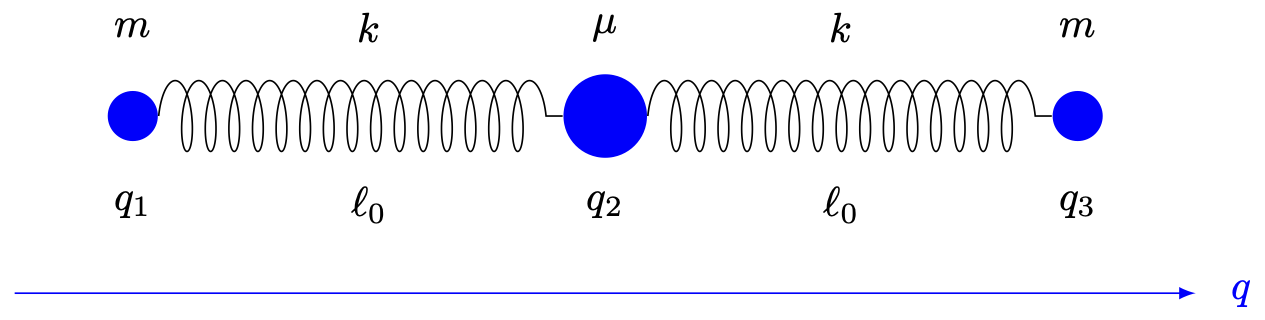

## Preamble

In [ ]:
import sympy as sp

Symbolic variables

In [ ]:
t, m, mu, k = sp.symbols('t, m, mu, k', positive=True)

Coordinates $x_i=q_i-q^0_i$ and velocities

In [ ]:
x1, x2, x3 = sp.Function('x1')(t), sp.Function('x2')(t), sp.Function('x3')(t)

In [ ]:
dot_x1, dot_x2, dot_x3 = x1.diff(t), x2.diff(t), x3.diff(t)

## Kinetic Energy $T$

In [ ]:
T=sp.Rational(1,2)*m*dot_x1**2+sp.Rational(1,2)*mu*dot_x2**2+sp.Rational(1,2)*m*dot_x3**2
T

m*Derivative(x1(t), t)**2/2 + m*Derivative(x3(t), t)**2/2 + mu*Derivative(x2(t), t)**2/2

## Potential Energy $U$

In [ ]:
U=sp.Rational(1,2)*k*(x2-x1)**2+sp.Rational(1,2)*k*(x3-x2)**2
U

k*(-x1(t) + x2(t))**2/2 + k*(-x2(t) + x3(t))**2/2

## Inertia Tensor

In [ ]:
def inertia_tensor(x):
  #This function calculates the inertia tensor given the generalized coordinates collected in a Matrix
  v=x.diff(t)
  A=sp.zeros(len(v))
  for i in range(len(v)):
    for j in range(len(v)):
      A[i,j]=sp.simplify((T.diff(v[i])).diff(v[j]))
  for k in range(len(x)):
    A=A.subs([(x[k],0)])
  return sp.simplify(A)

In [ ]:
M=inertia_tensor(sp.Matrix([[x1,x2,x3]]))
M

Matrix([
[m,  0, 0],
[0, mu, 0],
[0,  0, m]])

## Stiff Tensor

In [ ]:
def stiff_tensor(x):
  #This function calculates the stiff tensor given the generalized coordinates collected in a Matrix
  A=sp.zeros(len(x))
  for i in range(len(x)):
    for j in range(len(x)):
      A[i,j]=sp.simplify((U.diff(x[i])).diff(x[j]))
  for k in range(len(x)):
    A=A.subs([(x[k],0)])
  return sp.simplify(A)

In [ ]:
K=stiff_tensor(sp.Matrix([[x1,x2,x3]]))
K

Matrix([
[ k,  -k,  0],
[-k, 2*k, -k],
[ 0,  -k,  k]])

In this case, the Inertia Tensor is already diagonal, thus only the diagonalization of the rescaled stiff tensor is needed.

Rescaled Stiff Tensor

In [ ]:
W=sp.simplify(sp.sqrt(M)**(-1)*K*sp.sqrt(M)**(-1))
W

Matrix([
[                  k/m, -k/(sqrt(m)*sqrt(mu)),                     0],
[-k/(sqrt(m)*sqrt(mu)),                2*k/mu, -k/(sqrt(m)*sqrt(mu))],
[                    0, -k/(sqrt(m)*sqrt(mu)),                   k/m]])

Diagonalization

In [ ]:
Q,WD=W.diagonalize()

In [ ]:
Q

Matrix([
[               1, -1,                   1],
[sqrt(mu)/sqrt(m),  0, -2*sqrt(m)/sqrt(mu)],
[               1,  1,                   1]])

In [ ]:
WD

Matrix([
[0,   0,                     0],
[0, k/m,                     0],
[0,   0, (2*k*m + k*mu)/(m*mu)]])

In [ ]:
sp.simplify(sp.Inverse(Q)*W*Q)

Matrix([
[0,   0,            0],
[0, k/m,            0],
[0,   0, 2*k/mu + k/m]])

Orthonormalization of the eigenvectors in the modal matrix that produces and orthogonal matrix $O_W$ such that $O_W^T W O_W= W_D$

In [ ]:
OW=sp.simplify(Q*(sp.sqrt((sp.Transpose(Q)*Q)**(-1))))
OW

Matrix([
[ sqrt(m)/sqrt(2*m + mu), -sqrt(2)/2,              1/sqrt(4*m/mu + 2)],
[sqrt(mu)/sqrt(2*m + mu),          0, -sqrt(2)*sqrt(m)/sqrt(2*m + mu)],
[ sqrt(m)/sqrt(2*m + mu),  sqrt(2)/2,              1/sqrt(4*m/mu + 2)]])

Verification of orthonormality and diagonalization

In [ ]:
sp.simplify(sp.Transpose(OW)*OW)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [ ]:
sp.simplify(sp.Transpose(OW)*W*OW-WD)

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Squared Eigenfrequencies

In [ ]:
WD

Matrix([
[0,   0,                     0],
[0, k/m,                     0],
[0,   0, (2*k*m + k*mu)/(m*mu)]])

Modal Matrix

In [ ]:
S=(sp.sqrt(M)**(-1)*OW).simplify()
S

Matrix([
[1/sqrt(2*m + mu), -sqrt(2)/(2*sqrt(m)), sqrt(2)*sqrt(mu)/(2*sqrt(m)*sqrt(2*m + mu))],
[1/sqrt(2*m + mu),                    0,  -sqrt(2)*sqrt(m)/(sqrt(mu)*sqrt(2*m + mu))],
[1/sqrt(2*m + mu),  sqrt(2)/(2*sqrt(m)), sqrt(2)*sqrt(mu)/(2*sqrt(m)*sqrt(2*m + mu))]])

In [ ]:
(sp.Transpose(S)*M*S).simplify()

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [ ]:
(sp.Transpose(S)*K*S).simplify()

Matrix([
[0,   0,            0],
[0, k/m,            0],
[0,   0, 2*k/mu + k/m]])

Normal coordinates

In [ ]:
NC=sp.simplify(((S**(-1))*sp.Matrix([[x1],[x2],[x3]])))
NC

Matrix([
[                                                     (m*x1(t) + m*x3(t) + mu*x2(t))/sqrt(2*m + mu)],
[                                                                sqrt(2)*sqrt(m)*(-x1(t) + x3(t))/2],
[sqrt(2)*sqrt(m)*sqrt(mu)*(2*m + mu)**(3/2)*(x1(t) - 2*x2(t) + x3(t))/(2*(4*m**2 + 4*m*mu + mu**2))]])

## General solution

In [ ]:
xcm, vcm, A1, A2, B1, B2=sp.symbols(r'x_{cm}, v_{cm}, A1, A2, B1, B2')

In [ ]:
x_sol=sp.simplify((S*sp.Matrix([[xcm+vcm*t],[A1*sp.cos(WD[1,1]*t)+B1*sp.cos(WD[1,1]*t)],[A2*sp.cos(WD[2,2]*t)+B1*sp.cos(WD[2,2]*t)]])))
x_sol

Matrix([
[(sqrt(2)*sqrt(m)*sqrt(mu)*(A2 + B1)*sqrt(2*m + mu)*cos(k*t*(2/mu + 1/m)) - sqrt(2)*sqrt(m)*(A1 + B1)*(2*m + mu)*cos(k*t/m) + 2*m*sqrt(2*m + mu)*(t*v_{cm} + x_{cm}))/(2*m*(2*m + mu))],
[                                                                          (-sqrt(2)*sqrt(m)*(A2 + B1)*cos(k*t*(2/mu + 1/m)) + sqrt(mu)*(t*v_{cm} + x_{cm}))/(sqrt(mu)*sqrt(2*m + mu))],
[(sqrt(2)*sqrt(m)*sqrt(mu)*(A2 + B1)*sqrt(2*m + mu)*cos(k*t*(2/mu + 1/m)) + sqrt(2)*sqrt(m)*(A1 + B1)*(2*m + mu)*cos(k*t/m) + 2*m*sqrt(2*m + mu)*(t*v_{cm} + x_{cm}))/(2*m*(2*m + mu))]])